# Explore Exercises

__1) Spam Data__

* Load the spam data set.
* Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
* Is there any overlap in the bigrams for the spam data and the ham data?
* Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data. 

In [1]:
import numpy as np
import pandas as pd
import env

import matplotlib.pyplot as plt
import seaborn as sns

import prepare

import nltk
import nltk.sentiment
from wordcloud import WordCloud

### Acquire

In [2]:
spam_url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/spam_db'

In [3]:
spam_query = "SELECT * FROM spam"

In [4]:
text = pd.read_sql(spam_query, spam_url, index_col = 'id')
text

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."


### Prepare

The following function will clean, normalize, tokenize, stem, lemmatize, and remove stopwords.

In [5]:
#prepare the data
text = prepare.prepare_articles(text, 'text')
text

,label,original,clean,stemmed,lemmatized
id,,,,,
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail onli bugi n great ...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah ' think goes usf lives around though,nah ' think goe usf live around though,nah ' think go usf life around though
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u a750 pound prize ...,thi 2nd time tri 2 contact u u a750 pound priz...,2nd time tried 2 contact u u a750 pound prize ...
5568,ham,Will Ì_ b going to esplanade fr home?,b going esplanade fr home,b go esplanad fr home,b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions,piti wa mood soani suggest,pity wa mood soany suggestion


In [6]:
#split the text into spam and ham messages
spam = text[text.label == 'spam']
ham = text[text.label == 'ham']

In [16]:
#Join them all into one string
spam_words = ' '.join(spam.lemmatized)
ham_words = ' '.join(ham.lemmatized)

### Explore

For this exercise, I will use the lemmatized version of the text to explore on.

In [17]:
#Create bigrams for both the spam and ham messages
spam_bigrams = pd.Series(nltk.ngrams(spam_words.split(), 2))
ham_bigrams = pd.Series(nltk.ngrams(ham_words.split(), 2))

In [36]:
#Explore the spam bigram data
top_20_spam_bigrams = spam_bigrams.value_counts().head(20).sort_values(ascending = False)

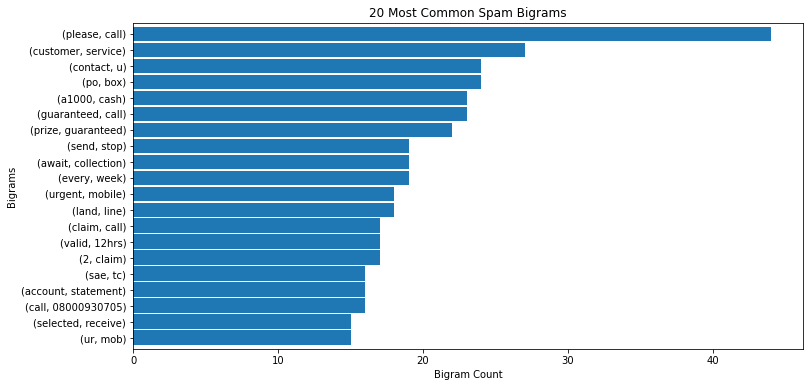

In [38]:
#Create a visualization for them
top_20_spam_bigrams.sort_values().plot.barh(width = .9, figsize = (12,6))
plt.xlabel('Bigram Count')
plt.ylabel('Bigrams')
plt.title('20 Most Common Spam Bigrams')
plt.show()

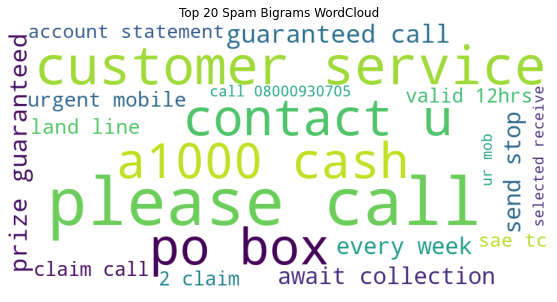

In [59]:
#Generate a wordcloud for the spam bigrams

#First create a dictionary for the fequencies of the bigrams
data = {k[0] + ' ' + k[1]: count for k, count in top_20_spam_bigrams.to_dict().items()}

#Now create the wordcloud
#Change the figsize before creating the wordcloud
plt.figure(figsize=(10, 5))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 20 Spam Bigrams WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()

In [53]:
#Now explore the ham bigrams
top_20_ham_bigrams = ham_bigrams.value_counts().head(20).sort_values(ascending = False)
top_20_ham_bigrams

(sorry, ')         52
(call, later)      52
(', ')             50
(', call)          45
(let, know)        41
(r, u)             37
(u, r)             34
(', going)         33
(wan, 2)           31
(good, morning)    31
(new, year)        30
(know, ')          29
(u, ')             28
(take, care)       26
(', ok)            24
(', gonna)         24
(u, get)           23
(yeah, ')          23
(u, wan)           23
(ok, lor)          22
dtype: int64

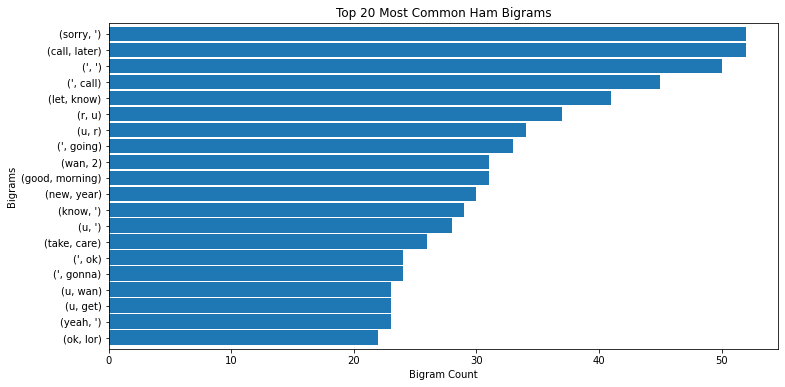

In [57]:
#Create a visualization of the ham bigrams
top_20_ham_bigrams.sort_values().plot.barh(width = 0.9, figsize = (12,6))
plt.title('Top 20 Most Common Ham Bigrams')
plt.xlabel('Bigram Count')
plt.ylabel('Bigrams')
plt.show()

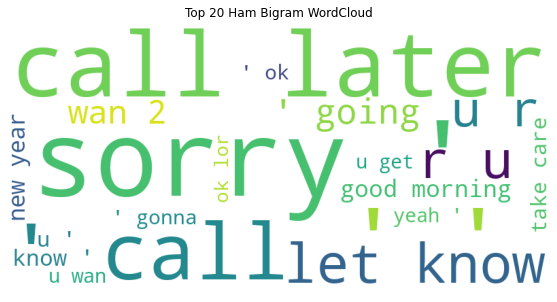

In [58]:
#Now create a word cloud of the ham bigrams
#Create another dictionary for the frequencies
data = {k[0] + ' ' + k[1]: count for k, count in top_20_ham_bigrams.to_dict().items()}

#Now create the wordcloud
#change the figsize before creating the wordcloud
plt.figure(figsize=(10,5))
image = WordCloud(background_color = 'white', width= 800, height = 400).generate_from_frequencies(data)
plt.title('Top 20 Ham Bigram WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()

In [60]:
#Now do the same things for the ham and spam trigrams
spam_trigrams = pd.Series(nltk.ngrams(spam_words.split(), 3))
ham_trigrams = pd.Series(nltk.ngrams(ham_words.split(), 3))

In [64]:
#Find the top 20 spam and ham trigrams
top_20_spam_trigrams = spam_trigrams.value_counts().head(20)
top_20_ham_trigrams = ham_trigrams.value_counts().head(20)

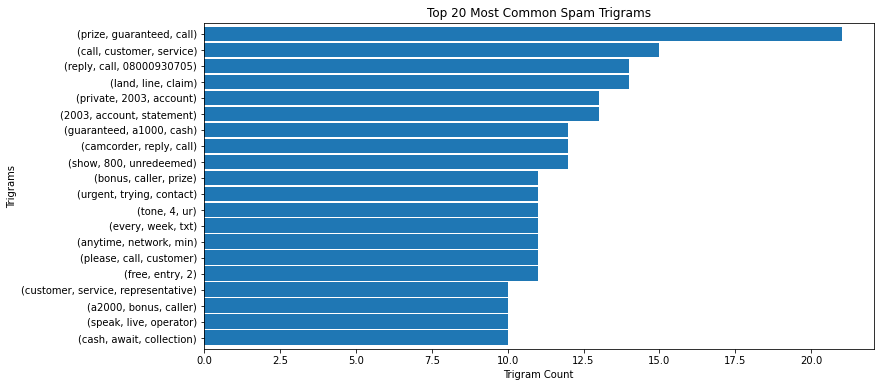

In [67]:
#Visualize the top 20 spam trigrams
top_20_spam_trigrams.sort_values().plot.barh(width = 0.9, figsize=(12,6))
plt.title('Top 20 Most Common Spam Trigrams')
plt.xlabel('Trigram Count')
plt.ylabel('Trigrams')
plt.show()

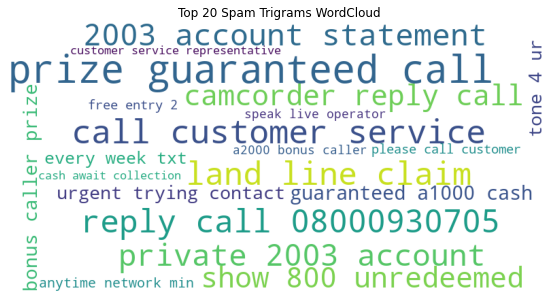

In [68]:
#Create a wordcloud for the spam trigrams
#Create the dictionary for the frequencies
data = {k[0] + ' ' + k[1] + ' ' + k[2]: count for k, count in top_20_spam_trigrams.to_dict().items()}

#Create the image
plt.figure(figsize=(10,5))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 20 Spam Trigrams WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()

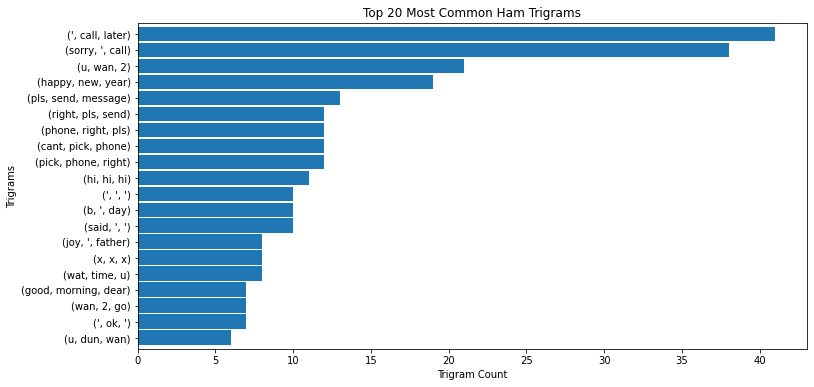

In [69]:
#Now create visualizations for the ham trigrams
top_20_ham_trigrams.sort_values().plot.barh(width=0.9, figsize=(12,6))
plt.title('Top 20 Most Common Ham Trigrams')
plt.xlabel('Trigram Count')
plt.ylabel('Trigrams')
plt.show()

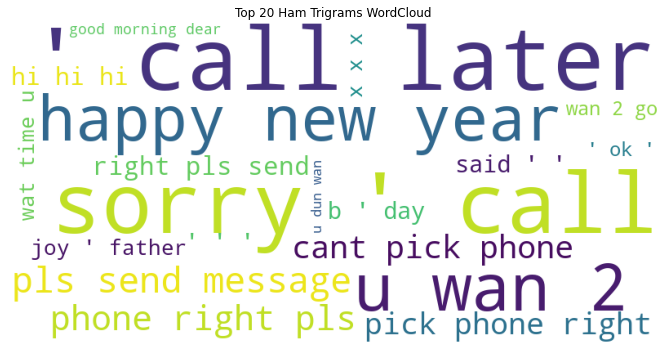

In [71]:
#Create the ham trigram wordcloud

#First create the dictionary for the frequencies
data = {k[0] + ' ' + k[1] + ' ' + k[2]: count for k, count in top_20_ham_trigrams.to_dict().items()}

#Now create the image
plt.figure(figsize=(12,6))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 20 Ham Trigrams WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()